In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

**Let's create a list of three highly correlated attributes for experimentation purpose**

In [3]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,1,2,3,4,5,6,7,8,9]
z = [0,0,2,2,4,4,5,8,8,8]

# 2D to 1D experiment 

I will create a dataframe of these two list just for comodity

In [4]:
#innesario quizás pero lo trataré después
df_nonencoded_xy = pd.concat([pd.Series(x).rename('x'),pd.Series(y).rename('y')],axis=1)
df_nonencoded_xz = pd.concat([pd.Series(x).rename('x'),pd.Series(z).rename('z')],axis=1)

**Now plot the data in a 2D plot with only x and y**

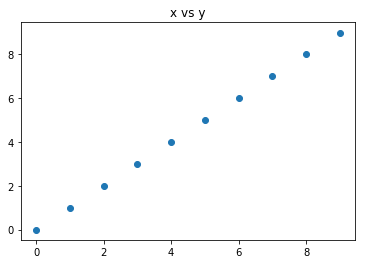

In [5]:
plt.scatter(x,y)
plt.title('x vs y')
plt.show()

**Now a 2D plot with only x and z to observe a difference**

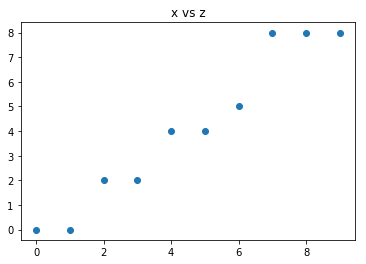

In [6]:
plt.scatter(x,z)
plt.title('x vs z')
plt.show()

#### One Hot Encoding no column dropped

In [7]:
x_e = pd.get_dummies(x, prefix='x', drop_first=False)

In [8]:
y_e = pd.get_dummies(y, prefix='y', drop_first=False)

In [9]:
df_encoded_xy = pd.concat([x_e,y_e],axis=1)#Maybe it is not necessary but I will use it

## PCA over non-encoded data

**x and y**

Create one principal component for these data

In [10]:
pca = PCA(n_components = 1, whiten=True)
pca_nonencoded_xy = pca.fit_transform(df_nonencoded_xy)

How much information it catches?

In [11]:
pca.explained_variance_ratio_

array([1.])

100% percent, obviously because there is a point in the space from which you can see all the data in 1d without changes in their variance. It's like using an optical illusion to make you observe in 1d the same that you'll able to see in 2d. Matter of perspective

**x and z**

Create one principal component for these data

In [12]:
pca = PCA(n_components = 1, whiten=True)
pca_nonencoded_xz = pca.fit_transform(df_nonencoded_xz)

Again, how much information it catches?

In [13]:
pca.explained_variance_ratio_

array([0.98752214])

#### Plots comparisson

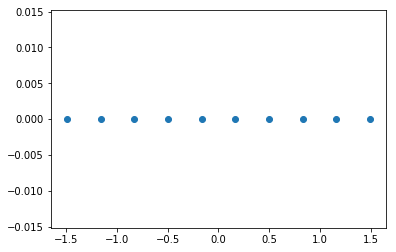

In [14]:
plt.scatter(pca_nonencoded_xy, [0]*10)
plt.show()

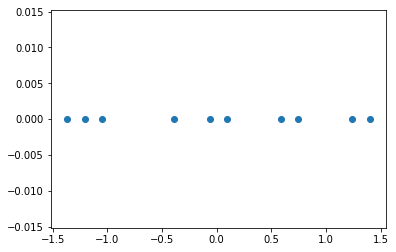

In [15]:
plt.scatter(pca_nonencoded_xz, [0]*10)
plt.show()

Two sets of points from maybe the same point of view (need to be sure and I this eigenvectors has the answer) and the representations were flipped for the pca

## PCA over enconded data x and y (OneHot)

Same again but for the multidimensional binary data

In [20]:
pca = PCA(n_components = 1, whiten=True)
pca_encoded_xy = pca.fit_transform(df_encoded_xy)

In [21]:
pca.explained_variance_ratio_

array([0.11111111])

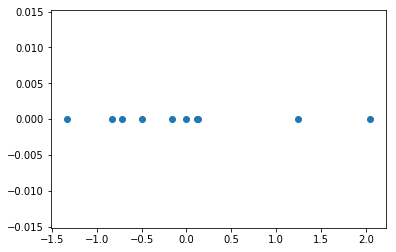

In [24]:
plt.scatter(pca_encoded_xy,[0]*10)
plt.show()

**Conclusion**: oneHot doesn't preserve the correlations between the attributes and that leads to a loss of information!

# 3D to 2D experimentation 

In [25]:
df_nonencoded_3d = pd.concat([pd.Series(x).rename('x'),pd.Series(y).rename('y'),pd.Series(z).rename('z')],axis=1)

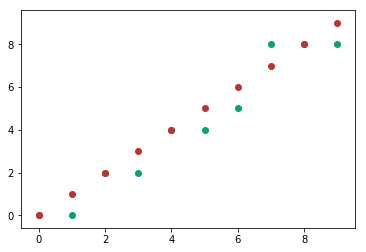

In [26]:
plt.scatter(x,z,c='#00aa66') #y z has the same sequence
plt.scatter(x,y,c='#bb3333') #some datapoint overlaps, we can just see 15 out 20 point.
plt.show()

**3D plot for a better visualization**

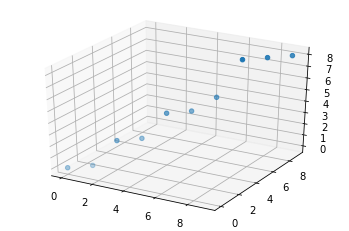

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

In [28]:
pca = PCA(n_components = 1, whiten=True)
pca_nonencoded_3d = pca.fit_transform(df_nonencoded_3d)

In [29]:
pca.explained_variance_ratio_

array([0.98864009])

When I performed this experimentation in two parts (x-y and x-z) the principal component that most information preserve was x-y. Now I think it has to be reflected here but the explained_variance_ratio_ doesn't seem to lead to that conclusion

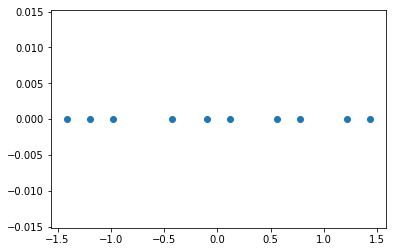

In [30]:
plt.scatter(pca_nonencoded_3d,[0]*10)
plt.show()

Rarely for me the visualization in 1-d is not the one I expected. Need check it out

#### Now 2 principal components

Here I think the representation will be the same of the 3D plot displayed above seen for a point of view

In [34]:
pca = PCA(n_components = 2, whiten=True)
pca_nonencoded_3d_2pc = pca.fit_transform(df_nonencoded_3d)

In [32]:
pca.explained_variance_ratio_

array([0.98864009, 0.01135991])

In [33]:
np.sum(pca.explained_variance_ratio_)

1.0

100%! Seems obvious but let's see the plot!

In [39]:
pca_nonencoded_3d_2pc

array([[ 1.43111571,  0.76470959],
       [ 1.21466577, -0.70613045],
       [ 0.77524462,  0.6786737 ],
       [ 0.55879468, -0.79216634],
       [ 0.11937353,  0.59263781],
       [-0.09707641, -0.87820223],
       [-0.42501195, -0.92122017],
       [-0.97591872,  1.89140607],
       [-1.19236865,  0.42056603],
       [-1.40881859, -1.05027401]])

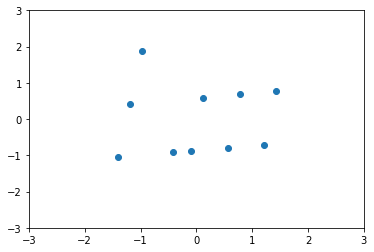

In [76]:
plt.scatter(pca_nonencoded_3d_2pc[:,0],pca_nonencoded_3d_2pc[:,1])
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

The same representation from a different point of view

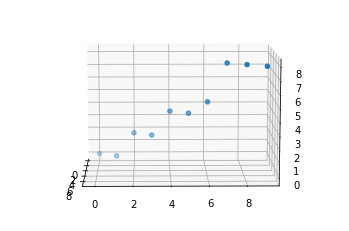

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, angle)
ax.scatter(x, y, z)